In [1]:
# Setting
## The path & packages
'upload'
#### Draft um Gitupload
!git init 
!git add . 
!git commit -m "Kleine Verbesserungen"
!git push

Bestehendes Git-Repository in /Users/mandoholzknecht/SE_Risk_Management/.git/ neuinitialisiert
[main ad4fa08] Kleine Verbesserungen
 1 file changed, 2138 insertions(+), 293 deletions(-)
Objekte aufzählen: 5, Fertig.
Zähle Objekte: 100% (5/5), Fertig.
Delta-Kompression verwendet bis zu 4 Threads.
Komprimiere Objekte: 100% (3/3), Fertig.
Schreibe Objekte: 100% (3/3), 53.87 KiB | 3.37 MiB/s, Fertig.
Gesamt 3 (Delta 2), Wiederverwendet 0 (Delta 0), Pack wiederverwendet 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/danIBK/SE_Risk_Management.git
   fe491fa..ad4fa08  main -> main


In [2]:
#Comment out the other paths and comment in your path
#path = r'C:\Users\heuse\Desktop\SE_Risk_Management-1/' #Daniel Path
path = '/Users/mandoholzknecht/SE_Risk_Management/' # Path Mando
#path = 'C:/Users/Fabio/OneDrive/Dokumente/Uni Innsbruck/WS20/Applied risk mgmt/SE/Heusli/SE_Risk_Management/' # Path Fabio

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.anova as anova
import scipy as sci

from sklearn import metrics

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import datetime


# Loading the data

Loading the Training dataset + Test dataset

In [3]:
# use the realtive path finding
df_train = pd.read_csv(path + 'Training_Dataset.csv', sep=';', index_col=None)
df_test = pd.read_csv(path + 'Test_Dataset.csv', sep=';', index_col=0)


checking the data

In [4]:
df_train.head()

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
0,C_405,0,GmbH & Co. KG,12359,46730,1900,NaN,GKV,1.068738e+08,1.068738e+08,...,NaN,3.224471e+07,37831990.81,17111465.66,10297047.50,NaN,NaN,6.986094e+06,-1.112342e+06,-7520392.09
1,C_292,0,GmbH & Co. KG,10719,70101,1976,NaN,GKV,1.393869e+06,1.407889e+06,...,NaN,4.508026e+06,4669178.63,927837.74,926383.75,NaN,NaN,-4.343980e+06,1.174427e+06,1128108.08
2,C_746,0,GmbH,13353,87100,1962,323.0,GKV,3.864034e+06,7.597353e+05,...,NaN,5.164048e+04,28101189.79,11116958.92,9146283.79,617816.28,NaN,9.548544e+06,-7.536444e+06,-22026.07
3,C_838,0,AG,12529,68320,1972,1.0,GKV,4.384786e+06,4.405058e+06,...,NaN,1.182011e+07,8238473.86,7519183.22,6890565.23,319848.26,NaN,1.715799e+06,-6.561222e+05,-169655.66
4,C_495,0,Einzelfirma,12165,47730,1908,NaN,GKV,1.104478e+08,1.104478e+08,...,NaN,4.547445e+08,35465651.58,8545183.94,5036615.09,516646.73,NaN,1.301809e+08,-1.419776e+08,12567030.80


In [5]:
df_test.head(8)

,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,gross_profit,earn_from_op,...,bonds_payables_lt,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing
id,,,,,,,,,,,,,,,,,,,,,
C_411,GmbH,14089,69204,1986,NaN,GKV,728946.68,728946.68,209721.36,45390.50,...,NaN,NaN,64195.98,28659.19,5598.17,NaN,NaN,52632.64,-534.87,-5.457891e+04
C_896,GmbH,13127,87100,1992,181.0,GKV,708847.33,708847.33,738495.17,13017.29,...,NaN,442875.57,479144.25,452033.96,442835.62,NaN,NaN,-10575.21,-1295.42,-5.820000e-11
C_252,GmbH,14059,86101,1993,505.0,GKV,26025323.61,26015542.03,22022993.85,2086104.36,...,NaN,13733666.50,14504753.93,3441491.02,322075.13,3034766.29,NaN,2862349.65,-667342.46,-2.091456e+06
C_165,GmbH,10437,87100,1995,82.0,GKV,1105332.48,1105332.48,717405.05,88074.80,...,NaN,381990.95,371506.04,343269.12,256395.19,NaN,NaN,156251.71,-57344.11,-1.160000e-10
C_856,GmbH,14943,96090,2002,22.0,GKV,51995424.22,51979901.95,46420844.34,5956777.13,...,NaN,6828494.53,18909648.90,15619860.60,6720068.91,8847966.22,NaN,5696079.15,-1418555.39,-4.163971e+06
C_415,GmbH,10969,68321,2006,NaN,GKV,13597456.35,13597456.35,7667501.25,-109859.68,...,NaN,0.00,1273354.65,1277275.04,5848.43,136628.62,NaN,83600.84,1560281.10,-1.643803e+06
C_520,GmbH,10625,68100,2010,NaN,GKV,10365544.05,10365544.05,7931366.20,565338.94,...,NaN,8823433.07,7715921.82,7749440.79,6802934.01,855343.08,NaN,1051697.31,-366425.37,-5.398260e+03
C_127,GmbH,29308,87100,2007,NaN,GKV,10129943.12,10486827.90,5959584.15,435328.26,...,NaN,1990015.77,3451499.64,1352994.01,1349.09,986648.60,NaN,-56012.29,-533257.11,4.586848e+05


# Variables

## Renaming of some colums
We decided to not rename any varialbes

## Further variable coding
Transforming variables

### Transforming year_inc to age columns
Transforming the year of incorporation variable to two age variables: one numerical (age_num) one and one categorical one (age_cat). 

In [6]:
df_train['age_num'] = datetime.datetime.now().year - df_train["year_inc"]
df_train.sort_values(by="age_num",ascending=False).head(5)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,635769.95,635769.95,...,37125.13,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,2020
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,241456.04,216900.58,...,514698.88,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,2020
272,C_543,0,AG,86150,68101,1464,NaN,GKV,73165008.12,73165008.12,...,7797900.20,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,556
249,C_105,0,AG,76185,70101,1856,NaN,GKV,53372139.09,53110170.33,...,7522638.74,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,164
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2713538.03,2713538.03,...,330130.46,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,163


As we have some firms which are pretty old (some > 100 years) and two outliers (2020s) we can set their value to the e.g.: 95% quantile as this shouldn't change the meaning of the age variable that much. They are long on the market and it does not really matter if they are long on the market (e.g.: 100 years) or very very long in the business (eg: above 500 years). 

In [7]:
#take a look on the quantiles
quantiles = list()
for i in range(0,100,):
    quantiles.append(df_train["age_num"].quantile(i/100))

age_th = df_train["age_num"].quantile(0.99)

#replace outliers with 99% quantile
df_train.loc[df_train["age_num"] > age_th,"age_num"] = age_th

df_train.sort_values(by="age_num",ascending=False).head(10)

,id,default,legal_form,zip_code,sector,year_inc,count_emp,type_pl,sales,gross_performance,...,total_equity,current_assets,monetary_current_assets,cash,trade_receivables_st,trade_receivables_lt,cf_operating,cf_investment,cf_financing,age_num
272,C_543,0,AG,86150,68101,1464,NaN,GKV,7.316501e+07,7.316501e+07,...,7.797900e+06,29653971.68,11687193.17,3444440.58,4254958.92,NaN,12170860.85,-6.620784e+05,-2.560090e+05,157.32
249,C_105,0,AG,76185,70101,1856,NaN,GKV,5.337214e+07,5.311017e+07,...,7.522639e+06,31608245.57,26918553.04,19531832.78,6509382.04,NaN,-10483605.89,-1.015179e+07,3.198861e+07,157.32
371,C_361,0,GmbH,21335,20520,1858,185.0,GKV,1.979305e+08,1.972723e+08,...,2.445527e+06,32809291.04,24618777.77,1012.13,24452421.93,NaN,11658956.29,-1.072492e+06,-1.088165e+07,157.32
572,C_482,0,Freiberufler,61169,49310,0,NaN,GKV,6.357699e+05,6.357699e+05,...,3.712513e+04,299815.83,268452.30,49009.81,NaN,NaN,-212829.13,-1.750000e-10,9.460000e-11,157.32
477,C_597,1,Freiberufler,32457,71113,0,NaN,GKV,2.414560e+05,2.169006e+05,...,5.146989e+05,639035.00,639951.26,7466.24,24518.87,NaN,14391.18,-7.090000e-11,1.204280e+03,157.32
283,C_519,0,GmbH,80807,18120,1862,NaN,GKV,1.560010e+06,4.462166e+06,...,3.912989e+05,1780853.40,507526.40,13989.13,NaN,NaN,-115009.30,-6.533309e+04,2.707314e+05,157.32
531,C_711,0,GmbH & Co. KG,42651,32501,1857,63.0,GKV,2.713538e+06,2.713538e+06,...,3.301305e+05,625173.80,462636.78,66853.99,281981.84,NaN,133580.07,-5.635444e+04,3.780000e-10,157.32
454,C_259,0,Freiberufler,44141,94110,1863,140.0,GKV,3.584665e+05,3.584665e+05,...,1.871424e+05,70476.90,61735.26,41618.21,NaN,NaN,22009.92,-1.400000e+05,1.307238e+05,157.00
165,C_347,0,GmbH,57072,25993,1866,116.0,GKV,2.645000e+05,2.645000e+05,...,1.834052e+04,186602.25,172230.65,1434.82,NaN,NaN,1484.67,4.500000e+01,0.000000e+00,154.00
445,C_019,0,AG,33689,70109,1870,107.0,GKV,2.432905e+06,2.432905e+06,...,-3.640000e-12,340903.37,340903.37,340903.37,NaN,NaN,1933900.10,0.000000e+00,-2.050780e+06,150.00


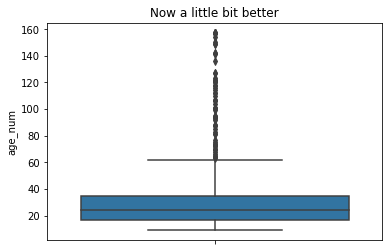

In [8]:
sns.boxplot(y=df_train["age_num"]).set_title("Now a little bit better");

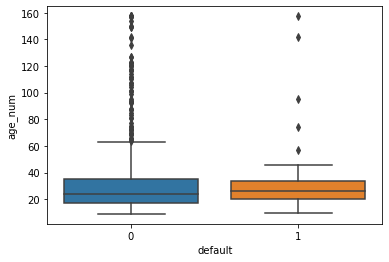

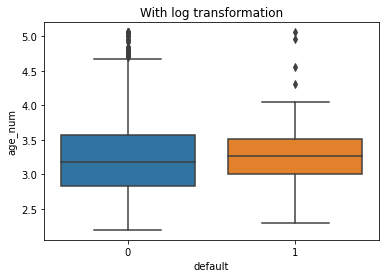

<Figure size 432x288 with 0 Axes>

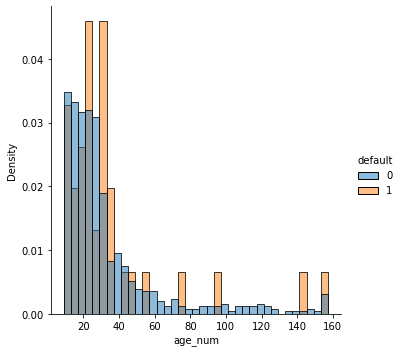

In [9]:
sns.boxplot(y="age_num",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["age_num"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="age_num",hue="default",stat="density",common_norm=False);

In [10]:
df_train["age_quartile"] = pd.qcut(df_train["age_num"],10)
pd.crosstab(df_train["default"],df_train["age_quartile"])

age_quartile,"(8.999, 12.0]","(12.0, 15.0]","(15.0, 19.0]","(19.0, 22.0]","(22.0, 24.0]","(24.0, 28.0]","(28.0, 31.0]","(31.0, 41.4]","(41.4, 65.0]","(65.0, 157.32]"
default,,,,,,,,,,
0,69,61,75,78,36,67,64,54,65,62
1,5,1,3,6,4,0,7,5,3,4


In [11]:
mdl = sm.Logit.from_formula('default ~ age_num + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.000   
Dependent Variable: default          AIC:              295.6596
Date:               2020-12-29 18:55 BIC:              304.6712
No. Observations:   669              Log-Likelihood:   -145.83 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:       667              LLR p-value:      0.72592 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
----------------------------------------------------------------
Intercept  -2.8762    0.2531  -11.3634  0.0000  -3.3723  -2.3801
age_num     0.0019    0.0054    0.3576  0.7206  -0.0087   0.0126



In [12]:
df_train["age_cat"] = np.select([
     df_train['age_num'].between(0, 19, inclusive=True),
     df_train['age_num'].between(20, 29, inclusive=True),
     df_train['age_num'].between(30, 39, inclusive=True),
     df_train['age_num'].between(40, 49, inclusive=True),
     df_train['age_num'].between(50, 59, inclusive=True),
     df_train['age_num'].between(60, np.inf, inclusive=True)], 
    ['10-19','20-29','30-39','40-49','50-59','>59'],)

pd.crosstab(df_train["default"],df_train["age_cat"])

age_cat,10-19,20-29,30-39,40-49,50-59,>59
default,,,,,,
0,205,206,81,44,27,68
1,9,12,10,2,1,4


In [13]:
mdl = sm.Logit.from_formula('default ~ age_cat + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.018   
Dependent Variable:  default          AIC:              298.5732
Date:                2020-12-29 18:55 BIC:              325.6079
No. Observations:    669              Log-Likelihood:   -143.29 
Df Model:            5                LL-Null:          -145.89 
Df Residuals:        663              LLR p-value:      0.39087 
Converged:           1.0000           Scale:            1.0000  
No. Iterations:      7.0000                                     
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept        -3.1258   0.3406 -9.1781 0.0000 -3.7933 -2.4583
age_cat[T.20-29]  0.2828   0.4519  0.6259 0.5314 -0.6028  1.1684
age_cat[T.30-39]  1.0339   0.4778  2.1637 0.0305  0.0974  1.9705
age_cat[T.40-49]  0.0347   0.7992  0.0435 0.9653 -

In [14]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']

for i in catvar:
    tmp1 = pd.crosstab(df_train['default'], df_train[i]).apply(lambda x: np.round(x/x.sum() * 100,2)).T.sort_values(by = i ,ascending=False)
    tmp2 = pd.crosstab(df_train['default'], df_train[i]).T.rename(columns={False: 'N_False', True: 'N_True'})
    tmp3 = pd.DataFrame(tmp2.apply(sum, axis=1), columns=['N'])
    tmp4 = tmp3.apply(lambda x: np.round(x/x.sum() * 100,2)).rename(columns={'N': 'N_Perc'})
    tmp = tmp1.join(tmp2).join(tmp3).join(tmp4)
    print('====================================================')
    print('Variable: ',i)
    print('---------------------------------------------------')
    print(tmp)
    print()
    del tmp1, tmp2, tmp3, tmp4, tmp

Variable:  id
---------------------------------------------------
           0    1  N_False  N_True  N  N_Perc
id                                           
C_995  100.0  0.0        1       0  1    0.15
C_994  100.0  0.0        1       0  1    0.15
C_992  100.0  0.0        1       0  1    0.15
C_990  100.0  0.0        1       0  1    0.15
C_986  100.0  0.0        1       0  1    0.15
...      ...  ...      ...     ... ..     ...
C_006  100.0  0.0        1       0  1    0.15
C_004  100.0  0.0        1       0  1    0.15
C_002  100.0  0.0        1       0  1    0.15
C_001  100.0  0.0        1       0  1    0.15
C_000  100.0  0.0        1       0  1    0.15

[669 rows x 6 columns]

Variable:  legal_form
---------------------------------------------------
                              0      1  N_False  N_True    N  N_Perc
legal_form                                                          
Verein                   100.00   0.00        1       0    1    0.15
Sonst. Gewerbetreibende   88.2

# Understanding your data


## Univartiate descriptive anaylsis

The datatype of the variables is important as in dermines how you have to look at the data

In [15]:
catvar = [i for i in list(df_train.columns) if df_train[i].dtype=='O']
catvar # categorial variables

['id', 'legal_form', 'type_pl', 'age_cat']

In [16]:
numvar = [i for i in list(df_train.columns) if df_train[i].dtype in ['float64','int64']]
numvar # numberical variables

['default',
 'zip_code',
 'sector',
 'year_inc',
 'count_emp',
 'sales',
 'gross_performance',
 'gross_profit',
 'earn_from_op',
 'fin_result',
 'oth_interest_inc',
 'oth_interest_exp',
 'result_from_ord_bus',
 'total_result',
 'annual_profit',
 'total_assets',
 'total_liabilities_st',
 'total_liabilities_mt',
 'total_liabilities_lt',
 'bank_liabilities_st',
 'bank_liabilities_mt',
 'bank_liabilities_lt',
 'trade_payables_st',
 'trade_payables_mt',
 'trade_payables_lt',
 'bonds_payables_st',
 'bonds_payables_mt',
 'bonds_payables_lt',
 'total_equity',
 'current_assets',
 'monetary_current_assets',
 'cash',
 'trade_receivables_st',
 'trade_receivables_lt',
 'cf_operating',
 'cf_investment',
 'cf_financing',
 'age_num']

## Missing values

Overview of missing values in the data

In [17]:
df_train.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          669
bonds_payables_st          669
trade_payables_lt          665
bonds_payables_mt          664
trade_payables_mt          648
trade_receivables_lt       645
bank_liabilities_lt        545
bank_liabilities_mt        483
trade_receivables_st       355
count_emp                  353
bank_liabilities_st        352
trade_payables_st          143
oth_interest_inc           127
oth_interest_exp            62
cash                        32
fin_result                  22
total_equity                21
gross_profit                 7
gross_performance            7
result_from_ord_bus          1
total_assets                 1
earn_from_op                 1
annual_profit                1
sales                        1
current_assets               1
cf_operating                 1
cf_investment                1
cf_financing                 1
year_inc                     0
sector                       0
zip_code                     0
type_pl                      0
legal_fo

In [18]:
df_test.isnull().sum().sort_values(ascending=False)

bonds_payables_lt          330
bonds_payables_st          330
trade_payables_lt          330
bonds_payables_mt          329
trade_payables_mt          322
trade_receivables_lt       320
bank_liabilities_lt        250
bank_liabilities_mt        230
count_emp                  179
bank_liabilities_st        172
trade_receivables_st       169
trade_payables_st           65
oth_interest_inc            62
oth_interest_exp            23
cash                        18
total_equity                 9
fin_result                   8
gross_performance            3
gross_profit                 3
cf_investment                1
cf_operating                 1
cf_financing                 1
earn_from_op                 0
year_inc                     0
sector                       0
type_pl                      0
sales                        0
zip_code                     0
total_liabilities_mt         0
result_from_ord_bus          0
total_result                 0
annual_profit                0
total_as

## Univariate Analysis
See the significance of every variable possible in the training set in an univariate setting and where NAs are dropped. We also ordered them according to their p values. Important to note here is the p value is not a KO-criteria for us.

In [41]:
col_list = df_train.columns[2:]
col_list
h = dict()

for i in range(0,len(col_list)):
    try:
        univ_var = pd.concat((df_train['default'],df_train[col_list[i]]),axis=1)
        print('NAs:', univ_var.iloc[:,1].isnull().sum()) #count NAs
        y = univ_var["default"]
        X = univ_var.iloc[:,1]
        X = sm.add_constant(X)
        print(X)
        model = sm.Logit(y,X,missing="drop").fit(disp=False,maxiter=100)
        print(model.summary2())
        pvalue = model.pvalues[1]
        h[col_list[i]] = (pvalue,univ_var.iloc[:,1].isnull().sum())
    except:
        continue

NAs: 0
     const     legal_form
0      1.0  GmbH & Co. KG
1      1.0  GmbH & Co. KG
2      1.0           GmbH
3      1.0             AG
4      1.0    Einzelfirma
..     ...            ...
664    1.0           GmbH
665    1.0           GmbH
666    1.0           GmbH
667    1.0  GmbH & Co. KG
668    1.0  GmbH & Co. KG

[669 rows x 2 columns]
NAs: 0
     const  zip_code
0      1.0     12359
1      1.0     10719
2      1.0     13353
3      1.0     12529
4      1.0     12165
..     ...       ...
664    1.0     82041
665    1.0     85716
666    1.0     85521
667    1.0     82031
668    1.0     85356

[669 rows x 2 columns]
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.004   
Dependent Variable: default          AIC:              294.4736
Date:               2020-12-29 19:05 BIC:              303.4851
No. Observations:   669              Log-Likelihood:   -145.24 
Df Model:           1                LL-Null:          -145.89 
Df Residuals:  

                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.002   
Dependent Variable: default          AIC:              295.1829
Date:               2020-12-29 19:05 BIC:              304.1915
No. Observations:   668              Log-Likelihood:   -145.59 
Df Model:           1                LL-Null:          -145.83 
Df Residuals:       666              LLR p-value:      0.48724 
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const          -2.7967   0.1673 -16.7152 0.0000 -3.1247 -2.4688
earn_from_op   -0.0000   0.0000  -0.6960 0.4864 -0.0000  0.0000

NAs: 22
     const   fin_result
0      1.0   1345910.44
1      1.0   1072009.59
2      1.0      2983.44
3      1.0     22350.95


                           Results: Logit
Model:                Logit              Pseudo R-squared:   0.003   
Dependent Variable:   default            AIC:                294.9659
Date:                 2020-12-29 19:05   BIC:                303.9775
No. Observations:     669                Log-Likelihood:     -145.48 
Df Model:             1                  LL-Null:            -145.89 
Df Residuals:         667                LLR p-value:        0.36617 
Converged:            1.0000             Scale:              1.0000  
No. Iterations:       8.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                -2.7782   0.1700 -16.3395 0.0000 -3.1115 -2.4450
total_liabilities_mt -0.0000   0.0000  -0.6592 0.5097 -0.0000  0.0000

NAs: 0
     const  total_liabilities_lt
0      

                         Results: Logit
Model:               Logit             Pseudo R-squared:  0.012  
Dependent Variable:  default           AIC:               17.0502
Date:                2020-12-29 19:05  BIC:               19.1392
No. Observations:    21                Log-Likelihood:    -6.5251
Df Model:            1                 LL-Null:           -6.6043
Df Residuals:        19                LLR p-value:       0.69054
Converged:           1.0000            Scale:             1.0000 
No. Iterations:      8.0000                                      
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -2.0887   0.8542 -2.4451 0.0145 -3.7629 -0.4144
trade_payables_mt -0.0000   0.0000 -0.2946 0.7683 -0.0000  0.0000

NAs: 665
     const  trade_payables_lt
0      1.0                NaN
1      1.0                NaN
2 

[669 rows x 2 columns]
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.058     
Dependent Variable: default          AIC:              264.7221  
Date:               2020-12-29 19:05 BIC:              273.6356  
No. Observations:   637              Log-Likelihood:   -130.36   
Df Model:           1                LL-Null:          -138.40   
Df Residuals:       635              LLR p-value:      6.0787e-05
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     12.0000                                      
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const    -2.4119     0.1926   -12.5247   0.0000   -2.7893   -2.0344
cash     -0.0000     0.0000    -2.0864   0.0369   -0.0000   -0.0000

NAs: 355
     const  trade_receivables_st
0      1.0                

In [40]:
pd.DataFrame.from_dict(h,orient="index",columns=['P-Value','NAs']).sort_values(by="P-Value")

,P-Value,NAs
cash,0.036941,32
year_inc,0.055606,0
total_equity,0.109640,21
gross_profit,0.153112,7
cf_operating,0.242710,1
bank_liabilities_lt,0.245019,545
zip_code,0.254582,0
total_liabilities_lt,0.259686,0
cf_investment,0.328421,1
total_assets,0.366245,1


Speaking in an univariate context, what we can see here is that no variable shows a very strong significance in the univariate logistic regression with the default variable as dependent variable. Also some variables can be disregarded as their numerical value makes no sense (e.g.: year_inc).  Thus we can argue, that a focus on economic reasoning instead of p-values in the univariate context is a better way to go. 

# Data cleaning

In [ ]:
# # drop companies with to many null columns 
df_train = df_train.loc[df_train["id"] != 'C_620'] 
# --> das ist gar nicht gut, ich brauche hier einen loop der entweder alle comps mit mehr als x Spalten NaNs dropt
# oder loop der alle corr Spalten checkt und wenn NaN dann drop comp

## Predict NaN for total equity
Source: https://towardsdatascience.com/predict-missing-values-in-the-dataset-897912a54b7b


Check for correlation to get relevant variables for regression

In [ ]:
print('corr total eqity x total result: ' + str(df_train['total_equity'].corr(df_train['total_result'])))
print('corr total eqity x total assets: ' + str(df_train['total_equity'].corr(df_train['total_assets'])))
print('corr total eqity x operating cash flow: ' + str(df_train['total_equity'].corr(df_train['cf_operating'])))


Split training and prediction dataset

In [ ]:
cols = ['total_result', 'total_assets', 'cf_operating', 'total_equity']
df = df_train[cols]
test_df = df[df['total_equity'].isnull()]
df = df.dropna()

y_train = df['total_equity']
X_train = df.drop('total_equity', axis=1)
X_test = test_df.drop('total_equity', axis=1)

Train model to fit dataset and predict missing values from column total equity and replace them

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

Replace the missing values with predicted values

In [ ]:
df_train.loc[df_train.total_equity.isnull(), 'total_equity'] = y_pred

## Financial ratios

We use two liquidity ratios (measure a companies ability to meet its short term dept obligations) that we will weight as one to circumvent overfitting

1. working capital ratio = current assets/current liabilities (use log because of skewed data)

In [ ]:
#create a column with total liabilities
df_train['total_liabilities'] = df_train['total_liabilities_st'] + df_train['total_liabilities_mt'] + df_train['total_liabilities_lt']

tr = df_train
tr['wc_ratio'] = np.log(tr['current_assets'])/np.log(tr['total_liabilities_st'])
plt.boxplot(tr.wc_ratio)
plt.show()

2. operating cash flow ratio = operating cf/current liabilities

In [ ]:
cf_pos = np.where(tr['cf_operating'] > 1, tr['cf_operating'], 0)
cf_neg = np.where(tr['cf_operating'] < -1, tr['cf_operating'], 0)
ocf = tr['cf_operating']/tr['total_liabilities_st']
# winsorize ocf
tr['ocf_ratio'] = sci.stats.mstats.winsorize(ocf, limits =[0.01, 0.015])
plt.boxplot(tr.ocf_ratio)
plt.show()

Next we use two solvency ratio (measure a companies ability to meet its long term dept obligations) that we will weight as one to circumvent overfitting

1. equity ratio = tot equity/total assets

In [ ]:
tr['equity_ratio'] = np.where(tr['total_equity'] > 1, np.log(tr['total_equity'])/np.log(tr['total_assets']), 0)
print(tr.equity_ratio)
print(tr.equity_ratio.describe())
plt.boxplot(tr.equity_ratio)
plt.show()

2. debt to equity ratio = total dept/total equity

In [ ]:
tr['debt_to_equity'] = np.where(tr['total_equity'] > 1, np.log(tr['total_liabilities'])/np.log(tr['total_equity']), 0)
print(tr.debt_to_equity.describe())
print(tr.debt_to_equity)
print(tr.debt_to_equity.value_counts()) #46 nulls
plt.boxplot(tr.debt_to_equity)
plt.show()

Create a dataframe with financial ratios and a heatmap to check for correlation between ratios

In [ ]:
col = ['wc_ratio', 'ocf_ratio', 'equity_ratio', 'debt_to_equity']
data = df_train[col]
print(data.head(10))
print(data.info())

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Financial Ratios Correlation Heatmap')
plt.show()

# Visualize differences in our variables of interest between default and non default 

Here we just want to visualize the difference in our variables of interest between default and non default firms in our training dataset. Also we ran univariate logisitc regression to determine if the ratio is significant in a univariate sense (is not a K.O. criteria).

Our variables of interest are, so the variables we will put in our logistic regression, are :

- Working Capital Ratio
- Operating Cashflow Ratio
- Equity Ratio
- Debt to Equity Ratio
- Cash

In [ ]:
df_train

## Working Capital Ratio

In [ ]:
sns.boxplot(y="wc_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["wc_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="wc_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ wc_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Operating Cash Flow Ratio

In [ ]:
sns.boxplot(y="ocf_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["ocf_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="ocf_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ ocf_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Equity Ratio 

In [ ]:
sns.boxplot(y="equity_ratio",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["equity_ratio"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="equity_ratio",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ equity_ratio + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [ ]:
pd.crosstab(df_train["default"],df_train["equity_ratio"]==0) #see that 6 defaulted with an equity ratio of 0

## Debt to Equity Ratio

In [ ]:
sns.boxplot(y="debt_to_equity",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["debt_to_equity"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="debt_to_equity",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ debt_to_equity + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

## Cash

In [ ]:
sns.boxplot(y="cash",x="default",data=df_train);
plt.figure()
sns.boxplot(y=np.log(df_train["cash"]),x="default",
            data=df_train).set_title("With log transformation");
plt.figure()
sns.displot(df_train,x="cash",hue="default",stat="density",common_norm=False);

mdl = sm.Logit.from_formula('default ~ cash + 1', data=df_train).fit(disp=False, maxiter=100)
print(mdl.summary2())

In [ ]:
# See better histogram of cash
x = df_train[df_train["cash"] < df_train["cash"].quantile(0.95)]
sns.displot(x,x="cash",hue="default",stat="density",common_norm=False);
plt.figure()
sns.boxplot(y="cash",x="default",data=x);
plt.figure()
sns.boxplot(y=np.log(x["cash"]),x="default",
            data=x).set_title("With log transformation");


# Our Logit Regression

In [ ]:
df_train

In [ ]:
mdl1 = sm.Logit.from_formula('default ~ wc_ratio + ocf_ratio + equity_ratio + debt_to_equity + cash  + 1',
                            data=df_train).fit(disp=False, maxiter=100)
print(mdl1.summary2())

In [ ]:
y = df_train["default"]
X = df_train[["wc_ratio","ocf_ratio","equity_ratio","debt_to_equity","cash"]]
X = X.fillna(0)
X = sm.add_constant(X)


mdl2 = sm.Logit(y,X).fit()
mdl2.summary2()

In [ ]:
# see how our model would have predicted the defaults 
s = pd.concat([df_train["default"],round(mdl1.predict(X)*100,2)],axis=1,)
s.columns = ["default","estimated PD in %"]
s.sort_values(by="estimated PD in %",ascending=False)

In [ ]:
s[s["default"] == 1]

# PD Model preparation

## Dependent variabel: Good/Bad (default) definition

# PD model estimation

# PD model validation

## Out of sample validation (test)
### Evaluation of model performance: accuracy and area under the curve (AUC)
### Evalution of model performance: Gini

Test fabio